In [1]:
import cvxpy as cp
import numpy as np
import osbdo as ob

(CVXPY) Oct 12 04:16:04 PM: Encountered unexpected exception importing solver SCS:
ImportError('dlopen(/opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/_scs_direct.cpython-310-darwin.so, 2): Symbol not found: _aligned_alloc\n  Referenced from: /opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/scs/.dylibs/libgomp.1.dylib (which was built for Mac OS X 10.15)\n  Expected in: /usr/lib/libSystem.B.dylib\n in /opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/scs/.dylibs/libgomp.1.dylib')


# Create parameters

In [2]:
params = ob.fl_params(num_samples=10000, num_agents=10, size=500)

# Distributed solution with limited memory $m$

In [3]:
agents = ob.fl_agents(params)
g = ob.fl_coupling(agents, params)
prob = ob.Problem(agents = agents, g = g)

In [4]:
max_iter = 100
memory = [20, 50, max_iter]
memory_bounds = {}
for m in memory:
    prob.solve(rel_gap=10**(-10), abs_gap=10**(-10), max_iter=max_iter, memory=m)
    memory_bounds[m] = {'uk':prob.upper_bnd, 'lk':prob.lower_bnd}

k=0, rel_gap=1.6767373885077049e+21, L=4.133904243507362e-18, U=6931.471805599453
k=1, rel_gap=125.16124807348798, L=54.941369964586286, U=6931.471805599453
k=2, rel_gap=45.3712621201104, L=94.64361115230815, U=4388.743700737486
k=3, rel_gap=18.441404377519216, L=148.41895556716662, U=2885.472932470343
k=4, rel_gap=7.74031718093256, L=223.80314785215145, U=1956.110498318949
k=5, rel_gap=4.42882162698176, L=259.5712749777403, U=1409.166151342386
k=6, rel_gap=3.147699595888225, L=339.7464350454278, U=1409.166151342386
k=7, rel_gap=2.1282083661990367, L=368.0623811327961, U=1151.3758199427511
k=8, rel_gap=1.6409472082192116, L=435.9707821343096, U=1151.3758199427511
k=9, rel_gap=1.4428655872750284, L=471.321805808845, U=1151.3758199427511
k=10, rel_gap=1.0435928761061053, L=497.29097671016984, U=1016.2602973567502
k=11, rel_gap=0.9083366140849088, L=532.5372315638718, U=1016.2602973567502
k=12, rel_gap=0.7945846952030909, L=566.292747326557, U=1016.2602973567502
k=13, rel_gap=0.6938790122

k=7, rel_gap=2.1282083661990367, L=368.0623811327961, U=1151.3758199427511
k=8, rel_gap=1.6409472082192116, L=435.9707821343096, U=1151.3758199427511
k=9, rel_gap=1.4428655872750284, L=471.321805808845, U=1151.3758199427511
k=10, rel_gap=1.0435928761061053, L=497.29097671016984, U=1016.2602973567502
k=11, rel_gap=0.9083366140849088, L=532.5372315638718, U=1016.2602973567502
k=12, rel_gap=0.7945846952030909, L=566.292747326557, U=1016.2602973567502
k=13, rel_gap=0.6938790122953354, L=599.9603808654787, U=1016.2602973567502
k=14, rel_gap=0.6418124648657167, L=618.9868326038503, U=1016.2602973567502
k=15, rel_gap=0.5477885219992363, L=646.3075268442037, U=1000.3473717311718
k=16, rel_gap=0.49648469471874024, L=663.0008326349157, U=992.1705986239324
k=17, rel_gap=0.4271278477120074, L=695.2219454021551, U=992.1705986239324
k=18, rel_gap=0.3186002328572094, L=730.9776697952288, U=963.8673256054091
k=19, rel_gap=0.25200233875778505, L=769.8606430414031, U=963.8673256054091
k=20, rel_gap=0.20

k=14, rel_gap=0.6418124648657167, L=618.9868326038503, U=1016.2602973567502
k=15, rel_gap=0.5477885219992363, L=646.3075268442037, U=1000.3473717311718
k=16, rel_gap=0.49648469471874024, L=663.0008326349157, U=992.1705986239324
k=17, rel_gap=0.4271278477120074, L=695.2219454021551, U=992.1705986239324
k=18, rel_gap=0.3186002328572094, L=730.9776697952288, U=963.8673256054091
k=19, rel_gap=0.25200233875778505, L=769.8606430414031, U=963.8673256054091
k=20, rel_gap=0.20267208632204864, L=789.9775925929122, U=950.083999431387
k=21, rel_gap=0.17393448523593583, L=809.3160320104579, U=950.083999431387
k=22, rel_gap=0.13817250755666005, L=834.7451665924995, U=950.083999431387
k=23, rel_gap=0.11775773628979475, L=849.9909851530333, U=950.083999431387
k=24, rel_gap=0.0920853496066269, L=865.0819440005808, U=944.7433172522548
k=25, rel_gap=0.07256997085125719, L=875.2672028311936, U=938.7853182277147
k=26, rel_gap=0.06524618086114102, L=881.2848476666719, U=938.7853182277147
k=27, rel_gap=0.052

# Centralized solution

In [5]:
h_cvx = ob.cvx_federated_learning(params=params)[2]

# Plot

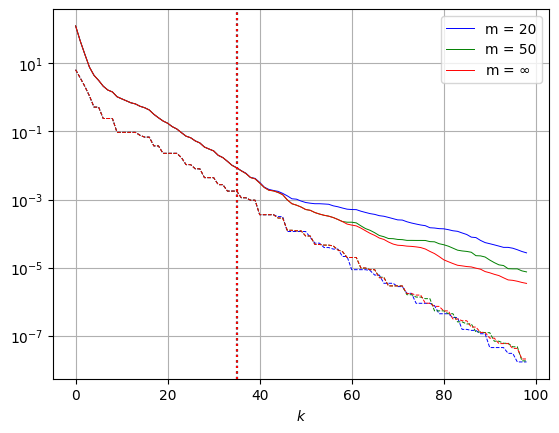

In [6]:
ob.plot_finite_memory(memory_bounds=memory_bounds, memory=memory, h_true=h_cvx)